In [20]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('vectorized_data.zip')

In [3]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

In [4]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']

In [5]:
len(X.columns)

40

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [7]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [8]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
feature_tables = pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables 

,0
time_stamp,0.030670
flesch_reading_ease,0.005598
flesch_kincaid_grade,0.005976
gunning_fog,0.028935
smog_index,0.000000
automated_readability_index,0.049455
coleman_liau_index,0.016154
dale_chall_readability_score,0.005602
linsear_write_formula,0.391546
hdd,0.007394


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
mean_squared_error(y_test, y_pred)

0.4150262302187621

In [12]:
predictions = [round(value) for value in y_pred]

In [13]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.59%


In [21]:
train_score = classification_report(y_test, predictions)
print(train_score)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       368
           2       0.41      0.00      0.01      5253
           3       0.53      0.97      0.69     23007
           4       0.63      0.08      0.14     15301
           5       0.00      0.00      0.00       107

    accuracy                           0.54     44036
   macro avg       0.32      0.21      0.17     44036
weighted avg       0.55      0.54      0.41     44036



/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## PCA

Text(0.5, 1.0, 'PCA cumulative explained variance')

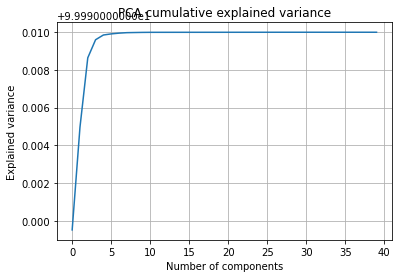

In [23]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [26]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,99.989515
2,99.994962
3,99.998644
4,99.999602
5,99.999854
6,99.999913
7,99.999952
8,99.999978
9,99.999985
10,99.999992


In [27]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [32]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.9999,1.0000,-0.0005,0.0002,0.0002,0.0000,0.0003,-0.0000,0.0000,0.0003,...,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000
Dimension 2,0.0001,-0.0004,-0.2818,0.0802,0.0824,0.0000,0.1054,0.0329,0.0255,0.1172,...,-0.0004,0.0003,0.0001,-0.0006,0.0003,0.0005,-0.0005,-0.0006,0.0015,-0.0004
Dimension 3,0.0000,0.0014,0.3877,-0.1287,-0.1215,-0.0000,-0.1586,-0.0194,0.0011,-0.1996,...,0.0002,-0.0001,0.0003,0.0001,0.0003,-0.0003,0.0004,0.0003,-0.0003,-0.0003
Dimension 4,0.0000,0.0001,-0.8152,0.0825,0.0417,0.0000,0.0533,0.1399,0.0422,0.0491,...,-0.0015,0.0038,0.0001,0.0014,0.0003,0.0018,-0.0025,-0.0009,0.0006,-0.0023
Dimension 5,0.0000,-0.0000,0.0017,0.0225,0.0303,0.0000,0.0279,-0.0226,-0.0101,0.0388,...,0.0007,-0.0008,-0.0004,0.0007,-0.0006,-0.0011,0.0007,0.0003,-0.0018,0.0006
Dimension 6,0.0000,-0.0000,0.1991,0.2058,0.4153,0.0000,0.2306,-0.2813,-0.0729,0.6869,...,-0.0037,-0.0047,0.0022,0.0042,0.0015,-0.0010,-0.0014,-0.0001,-0.0061,-0.0057
Dimension 7,0.0000,-0.0000,-0.1330,-0.0364,-0.1666,0.0000,-0.1997,-0.1150,-0.1543,-0.1868,...,0.0027,-0.0032,-0.0007,0.0019,-0.0009,-0.0001,0.0012,0.0060,-0.0055,0.0039
Dimension 8,0.0000,0.0000,0.1821,0.0305,-0.0735,-0.0000,0.6580,0.6827,-0.0134,-0.0691,...,-0.0034,0.0116,-0.0062,-0.0035,0.0027,-0.0003,0.0004,-0.0064,0.0091,-0.0010
Dimension 9,0.0000,-0.0000,0.0411,-0.0704,0.3596,-0.0000,-0.0794,0.0507,0.8954,-0.1327,...,-0.0038,0.0267,0.0141,0.0172,0.0025,0.0107,-0.0072,-0.0058,-0.0095,-0.0155
Dimension 10,0.0000,-0.0000,-0.0100,0.4695,-0.3152,0.0000,0.4889,-0.5442,0.1967,-0.3178,...,-0.0213,-0.0063,0.0092,0.0167,-0.0091,0.0136,-0.0036,0.0003,-0.0067,-0.0085


In [33]:
pca_results_40.iloc[0]

Explained Variance              0.9999
time_stamp                      1.0000
flesch_reading_ease            -0.0005
flesch_kincaid_grade            0.0002
gunning_fog                     0.0002
smog_index                      0.0000
automated_readability_index     0.0003
coleman_liau_index             -0.0000
dale_chall_readability_score    0.0000
linsear_write_formula           0.0003
hdd                            -0.0000
Summer                         -0.0000
Dugast                         -0.0004
words_count                     0.0011
unique_words                    0.0005
ttr                            -0.0000
rttr                            0.0000
cttr                            0.0000
mtld                           -0.0001
herdan                         -0.0000
maas                            0.0000
vec_1                          -0.0000
vec_2                          -0.0000
vec_3                          -0.0000
vec_4                           0.0000
vec_5                    

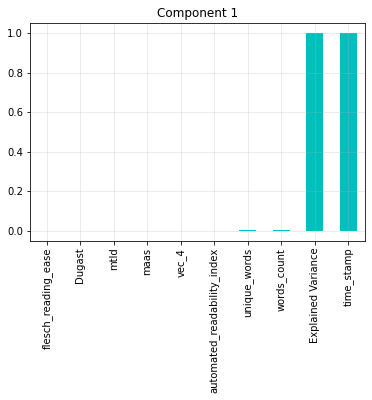

Accumulative explained varaince for Component 1 is 0.9999


flesch_reading_ease           -0.0005
Dugast                        -0.0004
mtld                          -0.0001
maas                           0.0000
vec_4                          0.0000
automated_readability_index    0.0003
unique_words                   0.0005
words_count                    0.0011
Explained Variance             0.9999
time_stamp                     1.0000
Name: Dimension 1, dtype: float64

In [35]:
pca_plot(pca_results_40, 1)
